In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [6]:
def add_bias_column(X):
    X_shape = X.shape
    X_new = np.ones((X.shape[0], X.shape[1]+1))
    X_new[:,1:] = X
    return X_new

In [7]:
def cost_function(y, y_hat):
    return np.sum(((y - y_hat)**2))/(2*len(y))

In [8]:
def load_data_and_init_params():
    '''
    Load the Boston houses dataset and randomly initialise linear regression weights.
    '''
    print('------ Loading Boston Houses Dataset ------')
    X, y = load_boston(True)
    X = add_bias_column(X)
    features = X.shape[1]

    # Initialize w
    w = np.random.randn(features).reshape(-1,1)

    return X, y.reshape(-1,1), w

In [9]:
def sgd(w, X, y, eta = 0.001):
    
    loss_arr = []
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
        loss_arr.append(cost)
        if (i%50 == 0): print("Cost:", cost)
        gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        #print(gradient)
        #print(w)
        w = w - eta*gradient
    
    y_hat = X.dot(w)
    print("Final cost:", cost_function(y, y_hat))
    print(w)
    return w, loss_arr

In [10]:
X, y, w = load_data_and_init_params()
print(X.shape, y.shape, w.shape)

------ Loading Boston Houses Dataset ------
(506, 14) (506, 1) (14, 1)


In [50]:
w_new, loss_arr = sgd(w, X, y, 0.000005)

Cost: 6903.81324507
Cost: 1634.90379662
Cost: 1149.40336899
Cost: 820.880159663
Cost: 597.281398926
Cost: 444.015195308
Cost: 338.05829156
Cost: 264.062308971
Cost: 211.774256902
Cost: 174.327150772
Cost: 147.10676636
Cost: 126.999948259
Cost: 111.895666989
Cost: 100.353551925
Cost: 91.3834396632
Cost: 84.2985481646
Cost: 78.6175108211
Cost: 73.998861607
Cost: 70.1970955803
Cost: 67.0330929824
Final cost: 64.374121944
[[-0.7738093 ]
 [-0.60787226]
 [ 0.05119247]
 [ 1.08992526]
 [ 1.69380348]
 [ 0.9503245 ]
 [-0.19698166]
 [-0.14159667]
 [-0.95512997]
 [ 0.85033445]
 [-0.03866607]
 [ 0.38428173]
 [ 0.07853658]
 [-0.13518068]]


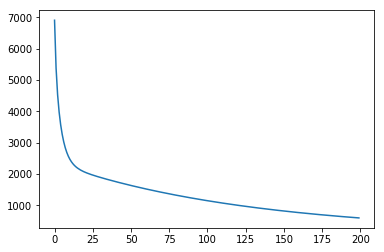

In [52]:
plt.plot(loss_arr[:200])

In [11]:
def sgd_first_order(w, X, y, eta = 0.001):
    
    eta_values = []
    loss_arr = []
    
    y_hat = X.dot(w)
    old_gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
    w = w - eta*old_gradient
    
    a = 0.000000001
    eta_values.append(eta)
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
        loss_arr.append(cost)
#         print(cost)
        if (i%50 == 0): print("Cost:", cost, "Eta", np.squeeze(eta))
        new_gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        
        scaled_old_gradient = (old_gradient - np.mean(old_gradient))/np.std(old_gradient)
        scaled_new_gradient = (new_gradient - np.mean(new_gradient))/np.std(new_gradient)
        
#         scaled_old_gradient = (old_gradient)/np.linalg.norm(old_gradient)
#         scaled_new_gradient = (new_gradient)/np.linalg.norm(new_gradient)
        
        dlr = -np.dot(scaled_old_gradient.T, scaled_new_gradient)
        # dlr = -np.dot(old_gradient.T, new_gradient)
        # taking cos (theta)
        
        w = w - eta* new_gradient
        eta = eta - a*dlr
        eta_values.append(eta[0,0])
#         print("eta:", eta)
        old_gradient = new_gradient
        
    y_hat = X.dot(w)
    print("Final cost:", cost_function(y, y_hat))
    print(w)
    return w,eta_values,loss_arr

In [194]:
X, y, w = load_data_and_init_params()
w_new, eta_values, loss_arr = sgd_first_order(w, X, y, 0.0000000001)

------ Loading Boston Houses Dataset ------
Cost: 343496.990435 Eta 1e-10
Cost: 1789.88708081 Eta 6.994884039440184e-07
Cost: 705.483240084 Eta 1.399442116508277e-06
Cost: 551.652087117 Eta 2.0993347455151956e-06
Cost: 478.372256104 Eta 2.7993155466506944e-06
Cost: 403.174032928 Eta 3.4993153423270873e-06
Cost: 331.828426206 Eta 4.199315154272514e-06
Cost: 269.196333294 Eta 4.899314850502694e-06
Cost: 217.560255673 Eta 5.5993143793816795e-06
Cost: 177.046257981 Eta 6.299313677258105e-06
Cost: 146.380461035 Eta 6.999312678530924e-06
Cost: 123.66047756 Eta 7.69931133925227e-06
Cost: 5662.48709229 Eta 8.067316358784546e-06
Cost: 7.32020629565e+18 Eta 7.367317188725308e-06
Cost: 4.74675066014e+26 Eta 6.667317188725298e-06
Cost: 4.91587075936e+25 Eta 5.967317188725288e-06
Cost: 4.47918673176e+13 Eta 5.2673171887252775e-06
Cost: 76.1222430436 Eta 5.033770491239861e-06
Cost: 73.377447889 Eta 5.733770046067255e-06
Cost: 70.7003950943 Eta 6.433769531488399e-06
Final cost: 68.1375926118
[[ 0.896

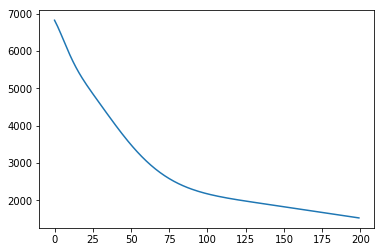

In [48]:
plt.plot(loss_arr[:200])

In [71]:
epsilon = 0.0000000001


def sgd_finite_differences(w, X, y, eta = 0.001):
    eta_values = []
    eta_values.append(eta)
    loss_arr = []
    for i in range(1000):
        y_hat = X.dot(w)
        cost = cost_function(y, y_hat)
        loss_arr.append(cost)
        if (i%50 == 0): print("Cost:", cost)
        gradient = -((y - y_hat).T.dot(X).reshape(-1,1))/y.shape[0]
        old_w = w
        w = w - eta*gradient
        eta = eta - 2*epsilon*(cost_function(y,X.dot(old_w-(eta+epsilon)*gradient)) - cost_function(y,X.dot(old_w-(eta-epsilon)*gradient)) + 10000*epsilon)/(10000*epsilon+cost_function(y,X.dot(old_w-(eta+2*epsilon)*gradient))+cost_function(y,X.dot(old_w-(eta-2*epsilon)*gradient))-2*cost_function(y,X.dot(old_w-eta*gradient)))  
        eta = np.squeeze(eta)
        eta_values.append(eta)
        if (i%50 == 0):
            print("Learned LR:", eta)
    print('learned coefficients: {},{}'.format(w[0],w[1]))
    return w, eta_values, loss_arr

In [72]:
X, y, w = load_data_and_init_params()

w_new, eta_values, loss_arr = sgd_finite_differences(w, X, y, 0.00001)

------ Loading Boston Houses Dataset ------
Cost: 106701.546998
Learned LR: 3.21138051082e-06
Cost: 179.403547363
Learned LR: 3.30956768579e-06
Cost: 170.464558852
Learned LR: 3.40573388878e-06
Cost: 162.565018497
Learned LR: 3.48714416262e-06
Cost: 155.569190315
Learned LR: 3.55636964901e-06
Cost: 149.352863873
Learned LR: 3.61551344937e-06
Cost: 143.804656948
Learned LR: 3.66630083432e-06
Cost: 138.827633107
Learned LR: 3.71013735348e-06
Cost: 134.339005894
Learned LR: 3.74816414576e-06
Cost: 130.268878315
Learned LR: 3.78130708024e-06
Cost: 126.558600052
Learned LR: 3.81031857556e-06
Cost: 123.15907381
Learned LR: 3.83581217504e-06
Cost: 120.029181317
Learned LR: 3.85829056652e-06
Cost: 117.134402379
Learned LR: 3.87816798304e-06
Cost: 114.445645292
Learned LR: 3.89578795268e-06
Cost: 111.93827826
Learned LR: 3.91143728078e-06
Cost: 109.59133854
Learned LR: 3.92535703807e-06
Cost: 107.386892073
Learned LR: 3.93775119245e-06
Cost: 105.309517
Learned LR: 3.94879340389e-06
Cost: 103.34

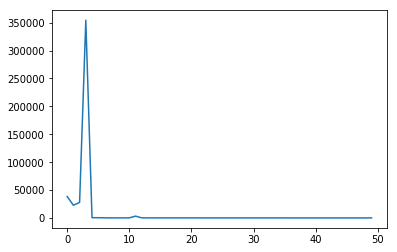

In [70]:
plt.plot(loss_arr[:50])

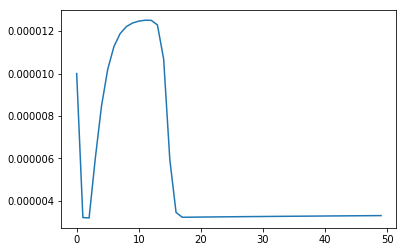

In [73]:
plt.plot(eta_values[:50])

In [114]:
epsilon = 0.0000000001


def stochastic_sgd_finite_differences(w, X, y, bs=64, eta = 0.00001):
    eta_values = []
    eta_values.append(eta)
    loss_arr = []
    for i in range(1000):
        for j in range(int(X.shape[0]/bs)):
            #print(j*bs)
            y_hat = X[j*(bs):(j+1)*bs].dot(w)
            cost = cost_function(y[j*(bs):(j+1)*bs], y_hat)
            loss_arr.append(cost)
            if (i%50 == 0): print("Cost:", cost)
            #print(y[j].shape, y_hat.shape, X[j].shape)
            gradient = -((y[j*(bs):(j+1)*bs] - y_hat).T.dot(X[j*(bs):(j+1)*bs]).reshape(-1,1))/y.shape[0]
            #print(gradient.shape)    
            old_w = w
            w = w - eta*gradient
            eta = eta - 2*epsilon*(cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-(eta+epsilon)*gradient)) - cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-(eta-epsilon)*gradient)) + epsilon)/(epsilon+cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-(eta+2*epsilon)*gradient))+cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-(eta-2*epsilon)*gradient))-2*cost_function(y[j*(bs):(j+1)*bs],X[j*(bs):(j+1)*bs].dot(old_w-eta*gradient)))  
            eta = np.squeeze(eta)
            eta_values.append(eta)
            if (i%50 == 0):
                print("Learned LR:", eta)
    print('learned coefficients:', w)
    return w, eta_values, loss_arr

In [115]:
X, y, w = load_data_and_init_params()

w_new, eta_values, loss_arr = stochastic_sgd_finite_differences(w, X, y, 64, 0.0000001)

------ Loading Boston Houses Dataset ------
Cost: 8435.72567672
Learned LR: 3.42380656579e-05
Cost: 6419.91261979
Learned LR: 3.03334263191e-05
Cost: 219.393077413
Learned LR: 2.86617262381e-05
Cost: 719.194548475
Learned LR: 3.35450346776e-05
Cost: 548.888642558
Learned LR: 3.46235234532e-05
Cost: 2089.35761178
Learned LR: 2.06024116811e-05
Cost: 803.29308471
Learned LR: 1.54770909592e-05
Cost: 404.598998919
Learned LR: 3.42510394363e-05
Cost: 219.389131339
Learned LR: 3.09598143205e-05
Cost: 129.069079078
Learned LR: 2.90061828956e-05
Cost: 328.500004334
Learned LR: 4.09324949426e-05
Cost: 222.51609893
Learned LR: 3.5089205001e-05
Cost: 689.383781096
Learned LR: 2.06313626568e-05
Cost: 439.017279156
Learned LR: 1.54519634062e-05
Cost: 221.60263682
Learned LR: 3.40969200754e-05
Cost: 114.368696394
Learned LR: 3.09773369505e-05
Cost: 102.173003519
Learned LR: 3.1046149927e-05
Cost: 179.180581295
Learned LR: 3.7252036117e-05
Cost: 111.164576605
Learned LR: 3.51061822856e-05
Cost: 325.94

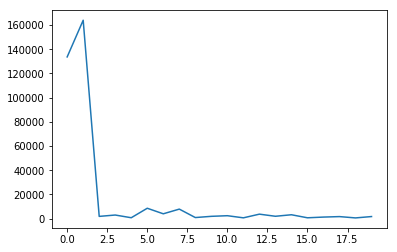

In [113]:
plt.plot(loss_arr[0:20])

In [118]:
true_w = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
print(true_w)

[[  3.64911033e+01]
 [ -1.07170557e-01]
 [  4.63952195e-02]
 [  2.08602395e-02]
 [  2.68856140e+00]
 [ -1.77957587e+01]
 [  3.80475246e+00]
 [  7.51061703e-04]
 [ -1.47575880e+00]
 [  3.05655038e-01]
 [ -1.23293463e-02]
 [ -9.53463555e-01]
 [  9.39251272e-03]
 [ -5.25466633e-01]]
